In [34]:
import os
import numpy as np
import pandas as pd
import sys
import sklearn

#import scipy.io as io
import os.path
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import f

In [4]:
np.random.seed(10)

In [317]:
def read_dataset(dataset_name, N_train):
    
    base_dir = os.path.dirname(os.path.realpath('__file__'))
    archive_name = 'UCRArchive'
    
    root_dir_dataset = base_dir + '/' + archive_name + '/' + dataset_name
    
    df_train = pd.read_csv(root_dir_dataset + '/' + dataset_name + '_TRAIN.tsv', sep='\t', header=None)
    
    df_test = pd.read_csv(root_dir_dataset + '/' + dataset_name + '_TEST.tsv', sep='\t', header=None)
    
    y_train = df_train.values[:, 0]
    y_test = df_test.values[:, 0]
    
    x_train = df_train.drop(columns=[0])
    x_test = df_test.drop(columns=[0])
    
    x_train.columns = range(x_train.shape[1])
    x_test.columns = range(x_test.shape[1])
    
    x_train = x_train.values
    x_test = x_test.values
    
    
    labels = np.hstack((y_train, y_test)).astype(int)
    _, labels = np.unique(labels, return_inverse=True)
    features = np.vstack((x_train, x_test))
    
    n_ = features.shape[0]
    shuffle_id = np.random.permutation(np.arange(n_))
    Dataset = features[shuffle_id]
    label = labels[shuffle_id]
    
    N, D = features.shape
        
    normal_data = Dataset[label==0]
    normal_labels = label[label==0]

    N_normal = normal_data.shape[0]

    attack_data = Dataset[label==1]
    attack_labels = label[label==1]

    N_attack = attack_data.shape[0]

    randIdx = np.arange(N_attack)
    np.random.shuffle(randIdx)

    train_data = attack_data[randIdx[:N_train]]
    train_labels = attack_labels[randIdx[:N_train]]
    
    test_data = attack_data[randIdx[N_train:]]
    test_labels = attack_labels[randIdx[N_train:]]
    
    test_data = np.concatenate((test_data, normal_data),axis=0)
    test_labels = np.concatenate((test_labels, normal_labels),axis=0)
    
    return Dataset,label,train_data,train_labels,test_data,test_labels

In [519]:
Result = {}

In [620]:
dataset_name = 'Wafer'# 'ItalyPowerDemand'
N_train = 3580

Dataset,labels,train_data,train_labels,test_data,test_labels = read_dataset(dataset_name, N_train)
N,L = Dataset.shape

m = L  
n = N_train

S_mean = np.mean(train_data, axis=0)
S_mean = np.array(S_mean)
S_var = np.std(train_data, ddof=1)
S_var = np.array(S_var)
train_data -= S_mean
train_data /= S_var
train_data = np.where(train_data < 1e6, train_data, 0.0) 
X_new = train_data

X_new = np.transpose(X_new)
Z = np.dot(X_new, train_data / (n - 1))

a, b = np.linalg.eig(Z)
lambda1 = sorted(a, reverse=True)
lambda_i = [round(i, 3) for i in lambda1]
print('lambda：', lambda_i)

lambda： [84.239, 12.406, 9.134, 3.898, 3.008, 2.157, 1.843, 1.73, 1.304, 1.102, 0.971, 0.878, 0.843, 0.796, 0.698, 0.592, 0.566, 0.491, 0.484, 0.463, 0.366, 0.356, 0.333, 0.319, 0.247, 0.238, 0.231, 0.225, 0.194, 0.179, 0.17, 0.164, 0.141, 0.125, 0.121, 0.118, 0.109, 0.097, 0.095, 0.087, 0.08, 0.075, 0.071, 0.067, 0.065, 0.059, 0.054, 0.05, 0.047, 0.043, 0.042, 0.042, 0.039, 0.039, 0.036, 0.034, 0.032, 0.031, 0.029, 0.026, 0.024, 0.024, 0.022, 0.022, 0.018, 0.017, 0.017, 0.016, 0.013, 0.013, 0.011, 0.01, 0.009, 0.009, 0.009, 0.008, 0.007, 0.006, 0.006, 0.005, 0.004, 0.004, 0.004, 0.004, 0.003, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [621]:
sum_given = 0
sum_given = sum(lambda_i)
variance_hud = []
for i in tqdm(range(m)):
    if i <= m:
        variance_hud.append(lambda_i[i] / sum_given)
    else:
        break
variance_hud = [round(i, 3) for i in variance_hud]
print('variance_hud：', variance_hud)

100%|██████████| 152/152 [00:00<00:00, 472247.56it/s]

variance_hud： [0.634, 0.093, 0.069, 0.029, 0.023, 0.016, 0.014, 0.013, 0.01, 0.008, 0.007, 0.007, 0.006, 0.006, 0.005, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [622]:
leiji_1 = []
new_value = 0
for i in tqdm(range(0, m)):
    if i <= m:
        new_value = new_value + variance_hud[i]
        leiji_1.append(new_value)
    else:
        break

totalvar = 0
for i in tqdm(range(m)):
    totalvar = totalvar + lambda1[i] / sum(a)
    if totalvar >= 0.85:
        k = i + 1
        break
PCnum = k
PC = np.eye(m, k)
for j in tqdm(range(k)):
    wt = a.tolist().index(lambda1[j])
    PC[:, j:j + 1] = b[:, wt:wt + 1]
#print('成分矩阵：', PC)
print('贡献率85%以上的主元个数为：', k)



100%|██████████| 6/6 [00:00<00:00, 37117.73it/s]

贡献率85%以上的主元个数为： 6


In [623]:
df_cfjz = pd.DataFrame(PC)

F = f.ppf(1 - 0.05, k, n - 1)
T2 = k * (n - 1) * F / (n - k)
ST1 = 0
ST2 = 0
ST3 = 0
for i in range(k - 1, m):
    ST1 = ST1 + lambda1[i]
    ST2 = ST2 + lambda1[i] * lambda1[i]
    ST3 = ST3 + lambda1[i] * lambda1[i] * lambda1[i]
h0 = 1 - 2 * ST1 * ST3 / (3 * pow(ST2, 2))
Ca = 1.6449
SPE = ST1 * pow(Ca * pow(2 * ST2 * pow(h0, 2), 0.5) / ST1 + 1 + ST2 * h0 * (h0 - 1) / pow(ST1, 2),
                1 / h0) 

m1 = test_data.shape[1]
n1 = test_data.shape[0]
test_data = np.array(test_data)
I = np.eye(m)
PC1 = np.transpose(PC)
SPEa = np.arange(n1).reshape(1, n1)
SPEa = np.double(SPEa)
TT2a = np.arange(n1).reshape(1, n1)
TT2a = np.double(TT2a)
DL = np.diag(lambda1[0:k])
DLi = np.linalg.inv(DL) 

In [624]:
for i in range(n1):
    xnew = (test_data[i, :] - S_mean) / S_var
    xnew1 = np.transpose(xnew)
    PC1 = np.transpose(PC)
    XPC = np.dot(xnew, PC)
    XPCPC1 = np.dot(XPC, PC1)
    XXPCPC1 = xnew - XPCPC1
    SPEa[0, i] = np.dot(XXPCPC1, XXPCPC1)
    XPi = np.dot(XPC, DLi)
    XPiP = np.dot(XPi, PC1)
    TT2a[0, i] = np.dot(XPiP, xnew1)

SPEa = SPEa[0]
#print('spe统计量的值：', SPEa)
# df_spe.to_csv('SPE.csv')
TT2a = TT2a[0]
#print('t2统计量的值：', TT2a)
# df_T2.to_csv('T2.csv')

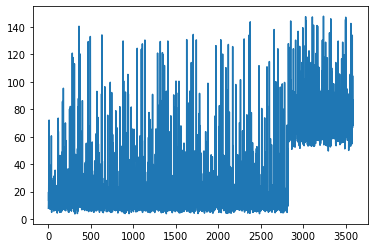

In [625]:
plt.plot(SPEa)

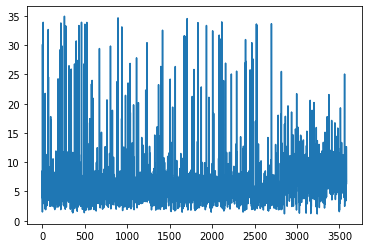

In [626]:
plt.plot(TT2a)

In [627]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [628]:
prediction = 0.5-0.5*np.sign(SPEa-50)
acc = accuracy_score(test_labels,prediction)
recall = recall_score(1-test_labels,1-prediction)
print('acc',acc)
print('recall',recall)

acc 0.9422433035714286
recall 0.9986876640419947


In [629]:
#Result[N_train/N] = [acc,recall]

In [637]:
print(np.array(list(Result.keys()))*N)
#print(Result[N_train/N])
display(Result)

[  10.   35.   71.  143.  358.  716. 3580.]


{0.0013958682300390843: [0.8255241822756499, 0.9309711286089237],
 0.004885538805136795: [0.9031420956655912, 0.9439632545931758],
 0.009910664433277499: [0.9125898773438601, 0.9728346456692913],
 0.019960915689558906: [0.9212647770972795, 0.9795275590551181],
 0.04997208263539922: [0.9360417278871582, 0.9791338582677167],
 0.09994416527079844: [0.9325062034739455, 0.9607611548556431],
 0.4997208263539922: [0.9433872767857142, 0.9876640419947507]}

In [631]:
#Result = {}

In [635]:
acc_=0
recall_=0
ave_n=10
#N_train=
for ep in range(ave_n):
    SPEa = SPE_calcu(N_train,'Wafer')
    prediction = 0.5-0.5*np.sign(SPEa-52)
    acc_ += accuracy_score(test_labels,prediction)
    recall_ += recall_score(1-test_labels,1-prediction)

Result[N_train/N] = [acc_/ave_n,recall_/ave_n]

100%|██████████| 6/6 [00:00<00:00, 13336.42it/s]


In [403]:
def SPE_calcu(N_train,dataset_name = 'ItalyPowerDemand'): #'Wafer'

    Dataset,labels,train_data,train_labels,test_data,test_labels = read_dataset(dataset_name, N_train)
    N,L = Dataset.shape

    m = L  
    n = N_train

    S_mean = np.mean(train_data, axis=0)
    S_mean = np.array(S_mean)
    S_var = np.std(train_data, ddof=1)
    S_var = np.array(S_var)
    train_data -= S_mean
    train_data /= S_var
    train_data = np.where(train_data < 1e6, train_data, 0.0) 
    X_new = train_data

    X_new = np.transpose(X_new)
    Z = np.dot(X_new, train_data / (n - 1))

    a, b = np.linalg.eig(Z)
    lambda1 = sorted(a, reverse=True)
    lambda_i = [round(i, 3) for i in lambda1]

    sum_given = 0
    sum_given = sum(lambda_i)
    variance_hud = []
    for i in tqdm(range(m)):
        if i <= m:
            variance_hud.append(lambda_i[i] / sum_given)
        else:
            break
    variance_hud = [round(i, 3) for i in variance_hud]
    #print('variance_hud：', variance_hud)

    leiji_1 = []
    new_value = 0
    for i in tqdm(range(0, m)):
        if i <= m:
            new_value = new_value + variance_hud[i]
            leiji_1.append(new_value)
        else:
            break

    totalvar = 0
    for i in tqdm(range(m)):
        totalvar = totalvar + lambda1[i] / sum(a)
        if totalvar >= 0.85:
            k = i + 1
            break
    PCnum = k
    PC = np.eye(m, k)
    for j in tqdm(range(k)):
        wt = a.tolist().index(lambda1[j])
        PC[:, j:j + 1] = b[:, wt:wt + 1]


    df_cfjz = pd.DataFrame(PC)

    F = f.ppf(1 - 0.05, k, n - 1)
    T2 = k * (n - 1) * F / (n - k)
    ST1 = 0
    ST2 = 0
    ST3 = 0
    for i in range(k - 1, m):
        ST1 = ST1 + lambda1[i]
        ST2 = ST2 + lambda1[i] * lambda1[i]
        ST3 = ST3 + lambda1[i] * lambda1[i] * lambda1[i]
    h0 = 1 - 2 * ST1 * ST3 / (3 * pow(ST2, 2))
    Ca = 1.6449
    SPE = ST1 * pow(Ca * pow(2 * ST2 * pow(h0, 2), 0.5) / ST1 + 1 + ST2 * h0 * (h0 - 1) / pow(ST1, 2),
                    1 / h0) 

    m1 = test_data.shape[1]
    n1 = test_data.shape[0]
    test_data = np.array(test_data)
    I = np.eye(m)
    PC1 = np.transpose(PC)
    SPEa = np.arange(n1).reshape(1, n1)
    SPEa = np.double(SPEa)
    TT2a = np.arange(n1).reshape(1, n1)
    TT2a = np.double(TT2a)
    DL = np.diag(lambda1[0:k])
    DLi = np.linalg.inv(DL) 

    for i in range(n1):
        xnew = (test_data[i, :] - S_mean) / S_var
        xnew1 = np.transpose(xnew)
        PC1 = np.transpose(PC)
        XPC = np.dot(xnew, PC)
        XPCPC1 = np.dot(XPC, PC1)
        XXPCPC1 = xnew - XPCPC1
        SPEa[0, i] = np.dot(XXPCPC1, XXPCPC1)
        XPi = np.dot(XPC, DLi)
        XPiP = np.dot(XPi, PC1)
        TT2a[0, i] = np.dot(XPiP, xnew1)

    SPEa = SPEa[0]
    TT2a = TT2a[0]

    return SPEa